In [1]:
!pip install wordcloud 
!pip install arabic-reshaper
!pip install python-bidi
!pip install cufflinks

In [2]:
import warnings
warnings.filterwarnings("ignore");

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import os
import codecs
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import f1_score

import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import sklearn 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raneemalmutairi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raneemalmutairi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df=pd.read_excel("/Users/raneemalmutairi/Desktop/SDAIA/data/Arabic_Tweets.xlsx",index_col=0)
df

,Unnamed: 0.1,text,Username,location,Timestamp,followers,label,categorie
0,3276,بشرى سارة لجماهير النادي الأهلي \nللتفاصيل htt...,Al3hdNews,"القاهرة, مصر",Sat Oct 10 19:41:00 +0000 2020,4,0,sport
1,879,@SXANJI لا احب الأنميات الرياضية يكفي اني اتاب...,fekrytarro22,"المنوفية, مصر",Thu Oct 08 20:10:28 +0000 2020,365,0,sport
2,1860,RT @kdzh37: الفتى الذهبي ⭐️ يعلن الاكتفاء ويضع...,hmde441,NaN,Fri Oct 09 20:55:46 +0000 2020,1663,0,sport
3,6342,RT @KSA24: يسألون \nليه #مقاطعة_البضائع_التركي...,saefAlJohaniksa,المملكة العربية السعودية,Tue Oct 13 01:38:17 +0000 2020,443,4,economy
4,4020,RT @Ahmed08911311: يوميا صفحه من القرآن \nكفيل...,wabil_,NaN,Sat Oct 10 21:27:14 +0000 2020,5873,2,religion
...,...,...,...,...,...,...,...,...
29554,1297,RT @nakl3af4: شركة الصفرات بالرياض\nنقل عفش با...,NourHom91041300,Syria,Fri Oct 09 16:40:36 +0000 2020,477,4,economy
29555,1844,RT @70sul: عندما يتحدث رئيس الغرف التجارية من ...,2002__light,"الجبيل, المملكة العربية السعودية",Fri Oct 09 21:35:06 +0000 2020,316,1,politic
29556,5389,RT @m_bukairy: رئيس النادي #الاهلي : وزارة الر...,ALHILALMCLUB,الهلال.💙,Mon Oct 12 16:48:16 +0000 2020,38,0,sport
29557,5307,RT @samialqorashi: اعطي لادارة الاتحاد ٢٤٤ ملي...,sssss1397,جدة عروس الكون JEDDAH ⁦⁦⁦,Mon Oct 12 16:45:32 +0000 2020,3621,0,sport


In [4]:
df.shape

(29559, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29559 entries, 0 to 29558
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  29559 non-null  int64 
 1   text          29559 non-null  object
 2   Username      29559 non-null  object
 3   location      14180 non-null  object
 4   Timestamp     29559 non-null  object
 5   followers     29559 non-null  int64 
 6   label         29559 non-null  int64 
 7   categorie     29559 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.0+ MB


In [6]:
df=df.dropna()
df

,Unnamed: 0.1,text,Username,location,Timestamp,followers,label,categorie
0,3276,بشرى سارة لجماهير النادي الأهلي \nللتفاصيل htt...,Al3hdNews,"القاهرة, مصر",Sat Oct 10 19:41:00 +0000 2020,4,0,sport
1,879,@SXANJI لا احب الأنميات الرياضية يكفي اني اتاب...,fekrytarro22,"المنوفية, مصر",Thu Oct 08 20:10:28 +0000 2020,365,0,sport
3,6342,RT @KSA24: يسألون \nليه #مقاطعة_البضائع_التركي...,saefAlJohaniksa,المملكة العربية السعودية,Tue Oct 13 01:38:17 +0000 2020,443,4,economy
5,1037,فئة شيوخ الدين الي الله يكثر من امثالهم❤️ http...,LulwaBuhazaa,Bahrain,Fri Oct 09 22:20:56 +0000 2020,884,2,religion
6,5910,RT @City_Line6: * 17 مليون و400 الف كل مجموع ا...,Mishal_mut3b,المملكة العربية السعودية,Mon Oct 12 17:05:09 +0000 2020,908,0,sport
...,...,...,...,...,...,...,...,...
29553,1380,RT @Musaid_AlSohimi: لستُ نصراوياً .. \nولا ته...,sjsallam2,"جدة, المملكة العربية السعودية",Fri Oct 09 20:45:44 +0000 2020,20530,0,sport
29554,1297,RT @nakl3af4: شركة الصفرات بالرياض\nنقل عفش با...,NourHom91041300,Syria,Fri Oct 09 16:40:36 +0000 2020,477,4,economy
29555,1844,RT @70sul: عندما يتحدث رئيس الغرف التجارية من ...,2002__light,"الجبيل, المملكة العربية السعودية",Fri Oct 09 21:35:06 +0000 2020,316,1,politic
29556,5389,RT @m_bukairy: رئيس النادي #الاهلي : وزارة الر...,ALHILALMCLUB,الهلال.💙,Mon Oct 12 16:48:16 +0000 2020,38,0,sport


In [7]:
df.isna().sum()

Unnamed: 0.1    0
text            0
Username        0
location        0
Timestamp       0
followers       0
label           0
categorie       0
dtype: int64

#Preprocessing

In [8]:
mystop = ['مثلا', 'الحمدلله', 'السنه', 'صوت', 'بو', 'تشوف',
 'موضوع', 'فتره', 'بعيد', 'الصوره', 'ابدا', 'الحب', 'الحمد', 'معاهم', 'قلبك', 'وانتي', 'لحد', 'واحنا', 'عمرك',
 'الحياه', 'امين', 'ابن', 'اخوي', 'مني', 'اسمه', 'ياخي', 'باقي', 'انتوا', 'حب', 'عندكم', 'شغل', 'كلامك', 'يسعد', 'تبي',
 'مبروك', 'طلعت', 'شلون', 'تعرف', 'كثر', 'بلا', 'وبعدين', 'عام', 'عيب', 'رمضان', 'البيت', 'نص', 'جديد',
 'ثاني', 'عارفه', 'فلوس', 'الصبح', 'الاول', 'شيء', 'صوره', 'فقط', 'وفي', 'جاي', 'جماعه', 'بن', 'خلص', 'وان', 'شعب',
 'واضح', 'تحت', 'طب', 'يلا', 'واذا', 'صارت', 'عنه', 'ضد', 'ماشي', 'لسه', 'يبي', 'بخير', 'روح',
 'حبيبي', 'سنين', 'كثير', 'زين', 'شوف', 'دايما', 'بكره', 'يجي', 'كلنا', 'الوقت', 'يبارك', 'اهم', 'معاه', 'مشكله',
 'الكويت', 'اشوف', 'فكره', 'لين', 'انهم', 'مكان', 'حرام', 'لله', 'يطلع', 'اعرف', 'افضل', 'صحيح', 'فوق', 'ترى',
 'اه', 'بعدين', 'المفروض', 'كبير','شكرا', 'تاني','ايه','احنا','وين','ليش','شو','الا', 'شفت', 'غلط', 'للاسف', 'تويتر',
 'نفسك', 'ساعه', 'معك', 'البلد', 'بنت', 'محد','اهل', 'معاك', 'نفسه', 'اشي', 'ايش', 'المهم', 'بقى', 'انتو', 'مافي', 'منو',
 'عاد', 'كلمه', 'اكبر', 'كلهم', 'والا', 'نفسي', 'المشكله', 'اقول', 'ايام', 'قاعد', 'يلي', 'زمان', 'الكل', 'انها', 'محمد',
 'ام', 'طلع', 'بكل', 'شويه', 'تقول', 'عليكم', 'الواحد', 'صباح', 'قلت', 'خلاص', 'يصير', 'الموضوع', 'عندهم', 'العالم',
 'الدنيا', 'الشعب', 'طبعا', 'طول', 'رب', 'الخير', 'اما', 'حلو', 'فعلا', 'مب', 'شوي', 'احد', 'وكل', 'وقت', 'فيهم', 'منك',
 'شخص', 'قلبي', 'الكلام', 'عارف', 'منهم', 'اخر', 'كلها', 'هاي', 'حلوه', 'اكتر', 'يمكن', 'تكون', 'لانه', 'واللي', 'كلام',
 'الحين', 'احلى', 'علشان', 'عندنا', 'بالله', 'الف', 'عندك', 'احسن', 'قطر', 'وحده', 'علينا', 'بدون', 'عنده', 'يقول', 'عادي',
 'كله', 'عليها', 'دا', 'حق', 'ابو', 'عليهم', 'اصلا', 'فيك', 'مصر', 'اكيد', 'اللى', 'كتير', 'رح', 'ربنا', 'كمان',
 'ليه', 'لان', 'اكثر', 'ال', 'وانت', 'انتي', 'طيب','سنه', 'كده', 'نفس', 'عندي', 'هيك','خير','صح','مين','شاء','مثل',
 'انو','زي','صار','انك','عم','ربي','يارب','حاجه','كنت','اليوم','اني','اول','ممكن','مره','دي','وانا','ناس','راح','حد',
 'لازم','يوم','ده','مو','علي','واحد','اي','الناس','يعني','عشان','اذا','انت','شي','هه','والله','مش','انا','الله','اللي',
 'الجديد', 'عالم', 'طريقه', 'تونس', 'كفايه', 'ارجع', 'التغريده', 'الاخر', 'السبب', 'حسن', 'صعبه', 'راسك', 'تحكي', 'عبد', 'لمن', 'عني',
 'والناس', 'عيونك', 'للناس', 'الصراحه', 'داخل', 'الامارات', 'رقم', 'العام', 'امريكا', 'حصل', 'خايف', 'لبنان', 'يتكلم', 'فرق', 'غريب',
 'العربيه', 'ماشاء', 'رغم', 'علاقه', 'يرحمه', 'الهلال', 'خلك', 'فيديو', 'مبارك', 'موجوده', 'ساعات', 'انته', 'لينا', 'المباراه', 'مافيه', 'ماراح',
 'شعور', 'ترجع', 'للحين', 'باي', 'شايف', 'باب', 'تميم', 'مدري', 'جاب', 'ولما', 'صاحب', 'يسلمك', 'صرت', 'الوطن', 'تانيه', 'الجيش',
 'يرجع', 'يحفظك', 'يعمل', 'لقيت', 'يرحم', 'صدق', 'الموسم', 'خالد', 'اهو', 'الفلوس', 'اغلب', 'وكان', 'اسبوع', 'اخي', 'قصه', 'الاقل',
 'هالشي', 'اغنيه', 'يستر', 'يابو', 'سنوات', 'عين', 'اسمع', 'يومين', 'بالضبط', 'مرات', 'كاس', 'كانو', 'خاصه', 'رجل', 'تستاهل', 'بعدها',
 'قادر', 'يخليك', 'امه', 'وربي', 'صور', 'نعرف', 'راه', 'اقسم', 'طيبه', 'الوحيد', 'بتكون', 'عيال','لاني', 'ياخذ',
 'بسرعه', 'رايح', 'امك', 'تقدر', 'تو', 'جديده', 'مساء', 'برضو', 'راسي', 'كفو', 'جمهور', 'مجرد', 'قاعده', 'مهم', 'ريال', 'غالي', 'اعمل',
 'الشيخ', 'شاءالله', 'برا', 'صلاح', 'الحلوه', 'صباحك', 'الدين', 'اروح', 'بكون', 'عيد', 'بلاش', 'عرفت', 'معانا', 'اسمها', 'النوم', 'يلعب',
 'شر', 'راس', 'خبر', 'ادري', 'الرجال', 'غيره', 'عايشين', 'وهم', 'واحده', 'شباب', 'فاهم', 'حالك', 'دور', 'اتمنى', 'حالي', 'الفيديو', 'بشكل',
 'بالعكس', 'حسب', 'كامل', 'وجه', 'كويس', 'يستاهل', 'ليبيا', 'الشارع', 'جو', 'قوي', 'الطيب', 'نقول', 'غيرك', 'ابي', 'عنها', 'قريب', 'بكرا',
 'تسلم', 'قالت', 'تعال', 'عارفين', 'تروح', 'راحت', 'فيني', 'حل', 'اقل', 'منكم', 'تجي', 'دام', 'بحب', 'بيكون', 'الليل', 'مباراه', 'الثاني',
 'الوكيل', 'عايش', 'روحي', 'الارض', 'بلد', 'بسبب', 'ايران', 'معه', 'حاليا', 'فيكم', 'تقريبا', 'الاهلي', 'الشخص', 'العين', 'دخل', 'يشوف',
 'فريق', 'ياريت', 'سبب', 'شكلك', 'العرب', 'مال', 'الفريق', 'ودي', 'يقدر', 'ماهو', 'بدل', 'يروح', 'بنات', 'بالي', 'قول', 'الجو', 'نبي', 'عمر',
 'رئيس', 'اختي', 'اكل', 'دكتور', 'تصير', 'رد', 'احس', 'العمر', 'امس', 'حال', 'ورا', 'وعلى', 'بقي', 'اجمل', 'عيني', 'صعب', 'شن', 'وهي',
 'وبس', 'كانوا', 'الدوله', 'صراحه', 'باذن', 'يبقى', 'كبيره', 'اعتقد', 'الشي', 'للي', 'اسم', 'صاير', 'ثانيه', 'نشوف', 'بالنسبه', 'سؤال', 'الحق',
 'كنا', 'لكل', 'ماله', 'يقولون', 'انسان', 'بالك', 'جميل', 'مستحيل', 'الساعه', 'حياتي', 'احب', 'اساس', 'الان', 'الوضع', 'عمل', 'ولد', 'البنات',
 'بصراحه', 'عنك', 'رجال', 'فين', 'يالله', 'الشباب', 'الايام', 'بلوك', 'تطلع', 'اتوقع', 'طبيعي', 'امي', 'قدام', 'ونعم', 'الحكومه', 'بيت', 'خل',
 'حساب', 'القلب', 'شهر', 'بعرف', 'احمد', 'حبيبتي', 'انتم', 'جد', 'حاله', 'البنت', 'حتي', 'عمره', 'موجود', 'فينا', 'اللهم', 'حسبي', 'يعرف',
 'بجد', 'عمري', 'العيد', 'عليا', 'معي', 'شكله', 'قلب',
 'شوفي','شفته','وانتم','يوصل','خصوصا','وبين','لعبه','المسلسل','نوع','الحلقه','وحتى','اى','اش',
 'عايشه','سعد','انشالله','كره','المكان','شهور','هديه','حلقه',
 'اكتب','فاهمه','صغيره','كون','قالو','الملعب','هدف','البحر','الاولى',
 'معروف','اقوى','تجيب','يضحك','خاطر','الصحه','واقف','مجلس','لحظه',
 'حبيب','السالفه','الشوق','دخلت','ومع','العربي','مصر',
 'روحك','بيهم', 'بتقول','يدخل','مسكين','فيلم','الثانيه','معناها',
 'عمان','العراق','ياارب','افهم','الفكره','تغريده','بال',
 'دقايق','اننا','الروح','حمار','شاف','الدول','يعطيك',
 'تركيا','معاكم','تدخل','الورد','نور','طويل','تركي',
 'شغله','جميع','خساره','وقتها','الكلب','بالخير','الغلط','قيمه','جمال','اجل','تمام','قليل',
 'ضروري','الطريق','معنا','المصري','قالك','تغير',
 'السؤال','بعده','بيقول','سلام','تعمل',
 'عز','اولا','ترامب','ليله','بره','تسوي','الفرق','دايم',
 'احبك','بالف','السياره','ماكو','تمشي',
 'الجاي','ثوره','احساس','يرد','وخلاص','مشاكل','ينزل','الباب','لانهم',
 'قويه','الحكم','حمد','نعمه','معاها','هاذي','جنب','عبدالله','قصدي',
 'الاكل','ثلاث','الانسان','قهوه','تدري','ايوه','وبعدها','مفروض','القصه','وجهه','الجامعه','غصب','الحلو','امل','الفيس','جايه',
 'يمشي','بدري','الحل','خاص','جيت','سوريا','لسانك','كلامي',
 'رحت','نزل','يسعدك','ونص','علم','المره','الك',
 'نفسهم','السلام','اشياء','الحال','حط','بصير','توصل', 'برنامج','يعنى','مثلك','بدايه','العظيم','قالوا','الغالي',
 'قوه','عيوني','حياتك','شخصيه','عمي','وسط','والي','طال',
 'لانها','اجازه','المغرب','عامل','سعيد','الصح','دقيقه','استاذ',
 'يلعن','غريبه', 'عربي','شئ','دليل','انكم','بينا',
 'شكل','معلش','مبرووك','تحس','يقولك','يحب','مدرب','العافيه','الحقيقه','مالها','نسيت','عدل',
 'دم','سمعت','خالص','وجهك','بنفس','اطلع','معقول','فرصه',
 'خليك','مات','ولاد','البشر','مسلسل','طريق','دائما',
 'اكون','ويا','يوفقك','حي','حياه',
 'عنهم','رايك','معاي','صغير','تتكلم','هوا','نفسها','ديما','كميه','قدر','حبيت','فايده','معهم','بطل',
 'زى','النصر','يسوي','سالفه','يجيب','الشغل','زايد','محتاج',
 'فاضي','كلب','كريم','بدها','زياده','ليها','مادري','اقدر',
 'طالع','قناه','حر','وصلت','انام','عليكي','لعب','جميله'
,'الامور','ازاي','بقول','لانك','عقب','وصل',
 'إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا',
'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي',
 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 
  'أم', 'أما', 'أما', 'إما', 'أن', 
  'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها',
 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما'
, 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما'
, 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به',
'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين','و', 'بيد',
'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك',
'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما',
'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك',
'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا',
'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا',
'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير',
'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها',
'قد', 'كأن', 'كأنما', 'كأي', 'كأين', 'كذا', 'كذلك', 'كل', 'كلا',
'كلاهما', 'كلتا', 'كلما', 'كليكما', 'كليهما', 'كم', 'كم', 'كما',
'كي', 'كيت', 'كيف', 'كيفما', 'لا', 'لاسيما', 'لدى', 'لست', 'لستم',
'لستما', 'لستن', 'لسن', 'لسنا', 'لعل', 'لك', 'لكم', 'لكما',
'لكن', 'لكنما', 'لكي', 'لكيلا', 'لم', 'لما', 'لن', 'لنا',
'له', 'لها', 'لهم', 'لهما', 'لهن', 'لو', 'لولا', 'لوما',
'لي', 'لئن', 'ليت', 'ليس', 'ليسا', 'ليست', 'ليستا', 'ليسوا', 'ما',
 'ماذا', 'متى', 'مذ', 'مع', 'مما', 'ممن', 'من', 'منه', 'منها', 'منذ',
'مه', 'مهما', 'نحن', 'نحو', 'نعم', 'ها', 'هاتان', 'هاته', 'هاتي',
'هاتين', 'هاك', 'هاهنا', 'هذا', 'هذان', 'هذه', 'هذي', 'هذين', 'هكذا',
'هل', 'هلا', 'هم', 'هما', 'هن', 'هنا', 'هناك', 'هنالك', 'هو', 'هؤلاء',
'هي', 'هيا', 'هيت', 'هيهات', 'والذي', 'والذين', 'وإذ', 'وإذا', 'وإن',
'ولا', 'ولكن', 'ولو', 'وما', 'ومن', 'وهو', 'يا'
, 'من' , 'على', 'الى','هما', 'مع', 'هذه', 'التي', 'كما ', 'ذلك ', 'لذا', 'عن', 'في','ان','كان','كانت','الى','قبل','أنه','تم'
 ,'وقال','قال','فى','وقد','قد','ولم',
'وذلك','ذلك','يكون','او'
,'وهذه','وهي ','وبعد','وهذا','عندها','جدا','بأن','انه','الي','للاسف','عشان','طيب','علشان','بدون','اكيد','عشان','تويتر','انت','وين','والله','الناس','مين',
'شخص','يعني','ليش','اكيد','ايه','كلام','يقول','تقول','عادي','عندك','قلبي','انتي','ناس','وانت',
'اني','انا' ,'وانا','يارب','الله','كنت','الان','هاي','العفاريت', 'حلب', 'حمص','ان','على','ال','بن','ليه','نقل عفش']

In [9]:
stop_set = set(mystop) # To make the word to unique

In [10]:
stop_ls = list(stop_set) # convert from set to list

In [11]:

COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'
HAMZA = u'\u0621'
ALEF_MADDA = u'\u0622'
ALEF_HAMZA_ABOVE = u'\u0623'
WAW_HAMZA = u'\u0624'
ALEF_HAMZA_BELOW = u'\u0625'
YEH_HAMZA = u'\u0626'
ALEF = u'\u0627'
BEH = u'\u0628'
TEH_MARBUTA = u'\u0629'
TEH = u'\u062a'
THEH = u'\u062b'
JEEM = u'\u062c'
HAH = u'\u062d'
KHAH = u'\u062e'
DAL = u'\u062f'
THAL = u'\u0630'
REH = u'\u0631'
ZAIN = u'\u0632'
SEEN = u'\u0633'
SHEEN = u'\u0634'
SAD = u'\u0635'
DAD = u'\u0636'
TAH = u'\u0637'
ZAH = u'\u0638'
AIN = u'\u0639'
GHAIN = u'\u063a'
TATWEEL = u'\u0640'
FEH = u'\u0641'
QAF = u'\u0642'
KAF = u'\u0643'
LAM = u'\u0644'
MEEM = u'\u0645'
NOON = u'\u0646'
HEH = u'\u0647'
WAW = u'\u0648'
ALEF_MAKSURA = u'\u0649'
YEH = u'\u064a'
MADDA_ABOVE = u'\u0653'
HAMZA_ABOVE = u'\u0654'
HAMZA_BELOW = u'\u0655'
ZERO = u'\u0660'
ONE = u'\u0661'
TWO = u'\u0662'
THREE = u'\u0663'
FOUR = u'\u0664'
FIVE = u'\u0665'
SIX = u'\u0666'
SEVEN = u'\u0667'
EIGHT = u'\u0668'
NINE = u'\u0669'
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
MINI_ALEF = u'\u0670'
ALEF_WASLA = u'\u0671'
FULL_STOP = u'\u06d4'
BYTE_ORDER_MARK = u'\ufeff'

# Diacritics
FATHATAN = u'\u064b'
DAMMATAN = u'\u064c'
KASRATAN = u'\u064d'
FATHA = u'\u064e'
DAMMA = u'\u064f'
KASRA = u'\u0650'
SHADDA = u'\u0651'
SUKUN = u'\u0652'

#Ligatures
LAM_ALEF = u'\ufefb'
LAM_ALEF_HAMZA_ABOVE = u'\ufef7'
LAM_ALEF_HAMZA_BELOW = u'\ufef9'
LAM_ALEF_MADDA_ABOVE = u'\ufef5'
SIMPLE_LAM_ALEF = u'\u0644\u0627'
SIMPLE_LAM_ALEF_HAMZA_ABOVE = u'\u0644\u0623'
SIMPLE_LAM_ALEF_HAMZA_BELOW = u'\u0644\u0625'
SIMPLE_LAM_ALEF_MADDA_ABOVE = u'\u0644\u0622'


HARAKAT_PAT = re.compile(u"["+u"".join([FATHATAN, DAMMATAN, KASRATAN,
                                        FATHA, DAMMA, KASRA, SUKUN,
                                        SHADDA])+u"]")
HAMZAT_PAT = re.compile(u"["+u"".join([WAW_HAMZA, YEH_HAMZA])+u"]")
ALEFAT_PAT = re.compile(u"["+u"".join([ALEF_MADDA, ALEF_HAMZA_ABOVE,
                                       ALEF_HAMZA_BELOW, HAMZA_ABOVE,
                                       HAMZA_BELOW])+u"]")
LAMALEFAT_PAT = re.compile(u"["+u"".join([LAM_ALEF,
                                          LAM_ALEF_HAMZA_ABOVE,
                                          LAM_ALEF_HAMZA_BELOW,
LAM_ALEF_MADDA_ABOVE])+u"]")


""" https://github.com/cltk/cltk/blob/master/cltk/corpus/arabic/alphabet.py """
WESTERN_ARABIC_NUMERALS = ['0','1','2','3','4','5','6','7','8','9']

#EASTERN_ARABIC_NUMERALS = [u'\u06F0', u'\u06F1', u'\u06F2', u'\u06F3', u'\u0664', u'\u06F5', u'\u0666', u'\u06F7', u'\u06F8', u'\u06F9']
EASTERN_ARABIC_NUMERALS = [u'۰', u'۱', u'۲', u'۳', u'٤', u'۵', u'٦', u'۷', u'۸', u'۹']

eastern_to_western_numerals = {}
for i in range(len(EASTERN_ARABIC_NUMERALS)):
    eastern_to_western_numerals[EASTERN_ARABIC_NUMERALS[i]] = WESTERN_ARABIC_NUMERALS[i]

# Punctuation marks
COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'

# Other symbols
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
FULL_STOP = u'\u06d4'
MULITIPLICATION_SIGN = u'\u00D7'
DIVISION_SIGN = u'\u00F7'

arabic_punctuations = COMMA + SEMICOLON + QUESTION + PERCENT + DECIMAL + THOUSANDS + STAR + FULL_STOP + MULITIPLICATION_SIGN + DIVISION_SIGN
all_punctuations = string.punctuation + arabic_punctuations + '()[]{}'

all_punctuations = ''.join(list(set(all_punctuations)))


In [12]:
def strip_tashkeel(text):
    text = HARAKAT_PAT.sub('', text)
    text = re.sub(u"[\u064E]", "", text,  flags=re.UNICODE) # fattha
    text = re.sub(u"[\u0671]", "", text,  flags=re.UNICODE) # waSla
    return text 

def strip_tatweel(text):
    return re.sub(u'[%s]' % TATWEEL, '', text)


def remove_non_arabic(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", text,  flags=re.UNICODE).split())


def keep_arabic_english_n_symbols(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u064aa-zA-Z#@_:/ ]", "", text,  flags=re.UNICODE).split())


def normalize_hamza(text):
    text = ALEFAT_PAT.sub(ALEF, text)
    return HAMZAT_PAT.sub(HAMZA, text)


def normalize_spellerrors(text):
    text = re.sub(u'[%s]' % TEH_MARBUTA, HEH, text)
    return re.sub(u'[%s]' % ALEF_MAKSURA, YEH, text)


def normalize_lamalef(text):
    return LAMALEFAT_PAT.sub(u'%s%s'%(LAM, ALEF), text)


def normalize_arabic_text(text):
    text = remove_non_arabic(text)
    text = strip_tashkeel(text)
    text = strip_tatweel(text)
    text = normalize_lamalef(text)
    text = normalize_hamza(text)
    text = normalize_spellerrors(text)
    return text


def remove_underscore(text):
    return ' '.join(text.split('_'))


def remove_retweet_tag(text):
    return re.compile('\#').sub('', re.compile('rt @[a-zA-Z0-9_]+:|@[a-zA-Z0-9_]+').sub('', text).strip())


def replace_emails(text):
    emails = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    for email in emails:
        text = text.replace(email,'#')
        #text = text.replace(email,' hasEmailAddress ')
    return text

def replace_urls(text):
    return re.sub(r"http\S+|www.\S+", "#", text)
    #return re.sub(r"http\S+|www.\S+", " hasURL ", text)

def convert_eastern_to_western_numerals(text):
    for num in EASTERN_ARABIC_NUMERALS:
        text = text.replace(num, eastern_to_western_numerals[num])
    return text

def remove_all_punctuations(text):
    for punctuation in all_punctuations:
        text = text.replace(punctuation, ' ')
    return text

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def replace_phone_numbers(text):
    return re.sub(r'\d{10}', '#', text)
    # return re.sub(r'\d{10}', ' hasPhoneNumber ', text)

def remove_extra_spaces(text):
    return ' '.join(text.split())

def normalize_tweet(text):
    new_text = text.lower()
    #new_text = normalize_hamza(new_text)
    new_text = strip_tashkeel(new_text)
    new_text = strip_tatweel(new_text)
    new_text = normalize_lamalef(new_text)
    #new_text = normalize_spellerrors(new_text)
    new_text = remove_retweet_tag(new_text)
    new_text = replace_emails(new_text)
    new_text = remove_underscore(new_text)
    new_text = replace_phone_numbers(new_text)
    new_text = remove_all_punctuations(new_text)
    new_text = replace_urls(new_text)
    new_text = convert_eastern_to_western_numerals(new_text)
#    new_text = keep_arabic_english_n_symbols(new_text)
    new_text = remove_non_arabic(new_text)
    new_text = remove_extra_spaces(new_text)
    
    return new_text


In [13]:
df['text'] = df['text'].apply(normalize_tweet)
df

,Unnamed: 0.1,text,Username,location,Timestamp,followers,label,categorie
0,3276,بشرى سارة لجماهير النادي الأهلي للتفاصيل,Al3hdNews,"القاهرة, مصر",Sat Oct 10 19:41:00 +0000 2020,4,0,sport
1,879,لا احب الأنميات الرياضية يكفي اني اتابعها علي ...,fekrytarro22,"المنوفية, مصر",Thu Oct 08 20:10:28 +0000 2020,365,0,sport
3,6342,يسألون ليه مقاطعة البضائع التركية ليه الدولة م...,saefAlJohaniksa,المملكة العربية السعودية,Tue Oct 13 01:38:17 +0000 2020,443,4,economy
5,1037,فئة شيوخ الدين الي الله يكثر من امثالهم,LulwaBuhazaa,Bahrain,Fri Oct 09 22:20:56 +0000 2020,884,2,religion
6,5910,مليون و الف كل مجموع المبالغ اللي تم الاعلان ع...,Mishal_mut3b,المملكة العربية السعودية,Mon Oct 12 17:05:09 +0000 2020,908,0,sport
...,...,...,...,...,...,...,...,...
29553,1380,لست نصراويا ولا تهمني قضايا النصر لكن تصل ان ح...,sjsallam2,"جدة, المملكة العربية السعودية",Fri Oct 09 20:45:44 +0000 2020,20530,0,sport
29554,1297,شركة الصفرات بالرياض نقل عفش بالرياض وبأقل الأ...,NourHom91041300,Syria,Fri Oct 09 16:40:36 +0000 2020,477,4,economy
29555,1844,عندما يتحدث رئيس الغرف التجارية من واقع مسؤولي...,2002__light,"الجبيل, المملكة العربية السعودية",Fri Oct 09 21:35:06 +0000 2020,316,1,politic
29556,5389,رئيس النادي الاهلي وزارة الرياضة خلال عدة أشهر...,ALHILALMCLUB,الهلال.💙,Mon Oct 12 16:48:16 +0000 2020,38,0,sport


In [14]:
# def remove_stopwords(text):
#      #Read a csv file containing 750 stopwords 
#     stopwords = pd.read_csv("Arabic-Stopword.csv")

#     stop=stopwords['text'].tolist()
#     text_list = text.split(' ')  # to remove stopwords easily  
#     new_text_list = []
#     for s in text_list:
#         if not (s in stop) and not(s in stop_ls): #Checks two lists
#             new_text_list.append(s)
        
#     text = ' '.join(e for e in new_text_list)  # gather text together again

#     return text
   

In [15]:
ar_sw = stopwords.words("arabic")
print(len(ar_sw))
'   '.join(ar_sw)

754


'إذ   إذا   إذما   إذن   أف   أقل   أكثر   ألا   إلا   التي   الذي   الذين   اللاتي   اللائي   اللتان   اللتيا   اللتين   اللذان   اللذين   اللواتي   إلى   إليك   إليكم   إليكما   إليكن   أم   أما   أما   إما   أن   إن   إنا   أنا   أنت   أنتم   أنتما   أنتن   إنما   إنه   أنى   أنى   آه   آها   أو   أولاء   أولئك   أوه   آي   أي   أيها   إي   أين   أين   أينما   إيه   بخ   بس   بعد   بعض   بك   بكم   بكم   بكما   بكن   بل   بلى   بما   بماذا   بمن   بنا   به   بها   بهم   بهما   بهن   بي   بين   بيد   تلك   تلكم   تلكما   ته   تي   تين   تينك   ثم   ثمة   حاشا   حبذا   حتى   حيث   حيثما   حين   خلا   دون   ذا   ذات   ذاك   ذان   ذانك   ذلك   ذلكم   ذلكما   ذلكن   ذه   ذو   ذوا   ذواتا   ذواتي   ذي   ذين   ذينك   ريث   سوف   سوى   شتان   عدا   عسى   عل   على   عليك   عليه   عما   عن   عند   غير   فإذا   فإن   فلا   فمن   في   فيم   فيما   فيه   فيها   قد   كأن   كأنما   كأي   كأين   كذا   كذلك   كل   كلا   كلاهما   كلتا   كلما   كليكما   كليهما   كم   كم   كما   كي   كيت   كيف   كيفما 

In [16]:
ar_sw = r'\b(?:{})\b'.format('|'.join(ar_sw))
ar_sw

'\\b(?:إذ|إذا|إذما|إذن|أف|أقل|أكثر|ألا|إلا|التي|الذي|الذين|اللاتي|اللائي|اللتان|اللتيا|اللتين|اللذان|اللذين|اللواتي|إلى|إليك|إليكم|إليكما|إليكن|أم|أما|أما|إما|أن|إن|إنا|أنا|أنت|أنتم|أنتما|أنتن|إنما|إنه|أنى|أنى|آه|آها|أو|أولاء|أولئك|أوه|آي|أي|أيها|إي|أين|أين|أينما|إيه|بخ|بس|بعد|بعض|بك|بكم|بكم|بكما|بكن|بل|بلى|بما|بماذا|بمن|بنا|به|بها|بهم|بهما|بهن|بي|بين|بيد|تلك|تلكم|تلكما|ته|تي|تين|تينك|ثم|ثمة|حاشا|حبذا|حتى|حيث|حيثما|حين|خلا|دون|ذا|ذات|ذاك|ذان|ذانك|ذلك|ذلكم|ذلكما|ذلكن|ذه|ذو|ذوا|ذواتا|ذواتي|ذي|ذين|ذينك|ريث|سوف|سوى|شتان|عدا|عسى|عل|على|عليك|عليه|عما|عن|عند|غير|فإذا|فإن|فلا|فمن|في|فيم|فيما|فيه|فيها|قد|كأن|كأنما|كأي|كأين|كذا|كذلك|كل|كلا|كلاهما|كلتا|كلما|كليكما|كليهما|كم|كم|كما|كي|كيت|كيف|كيفما|لا|لاسيما|لدى|لست|لستم|لستما|لستن|لسن|لسنا|لعل|لك|لكم|لكما|لكن|لكنما|لكي|لكيلا|لم|لما|لن|لنا|له|لها|لهم|لهما|لهن|لو|لولا|لوما|لي|لئن|ليت|ليس|ليسا|ليست|ليستا|ليسوا|ما|ماذا|متى|مذ|مع|مما|ممن|من|منه|منها|منذ|مه|مهما|نحن|نحو|نعم|ها|هاتان|هاته|هاتي|هاتين|هاك|هاهنا|هذا|هذان|هذه|هذي|هذين|هكذا|هل|هلا|هم|هما|هن|

In [17]:
df['text']=df['text'].str.replace(ar_sw, '')
df['text'].tail(10)

29540    نشترى الاثاث المستعمل بالرياض بأفضل الاسعار غر...
29542    قادرين تتخيلو وتتوقعو انو دا مركز تحفيظ  صيانه...
29543    مبروك  شيخ الاندية الخليجية  معقل البطولات تست...
29547    كابتن مجدى سؤال خارج السياق حضرتك عايز تترشح ل...
29552    اللهم إني أعوذ   الهم والحزن والعجز والكسل وال...
29553     نصراويا  تهمني قضايا النصر  تصل ان حساب قناته...
29554    شركة الصفرات بالرياض نقل عفش بالرياض وبأقل الأ...
29555    عندما يتحدث رئيس الغرف التجارية  واقع مسؤوليته...
29556    رئيس النادي الاهلي وزارة الرياضة خلال عدة أشهر...
29557    اعطي لادارة الاتحاد مليون  عامها الاول    ننسى...
Name: text, dtype: object

In [18]:
df

,Unnamed: 0.1,text,Username,location,Timestamp,followers,label,categorie
0,3276,بشرى سارة لجماهير النادي الأهلي للتفاصيل,Al3hdNews,"القاهرة, مصر",Sat Oct 10 19:41:00 +0000 2020,4,0,sport
1,879,احب الأنميات الرياضية يكفي اني اتابعها علي ار...,fekrytarro22,"المنوفية, مصر",Thu Oct 08 20:10:28 +0000 2020,365,0,sport
3,6342,يسألون ليه مقاطعة البضائع التركية ليه الدولة ...,saefAlJohaniksa,المملكة العربية السعودية,Tue Oct 13 01:38:17 +0000 2020,443,4,economy
5,1037,فئة شيوخ الدين الي الله يكثر امثالهم,LulwaBuhazaa,Bahrain,Fri Oct 09 22:20:56 +0000 2020,884,2,religion
6,5910,مليون الف مجموع المبالغ اللي تم الاعلان تبر...,Mishal_mut3b,المملكة العربية السعودية,Mon Oct 12 17:05:09 +0000 2020,908,0,sport
...,...,...,...,...,...,...,...,...
29553,1380,نصراويا تهمني قضايا النصر تصل ان حساب قناته...,sjsallam2,"جدة, المملكة العربية السعودية",Fri Oct 09 20:45:44 +0000 2020,20530,0,sport
29554,1297,شركة الصفرات بالرياض نقل عفش بالرياض وبأقل الأ...,NourHom91041300,Syria,Fri Oct 09 16:40:36 +0000 2020,477,4,economy
29555,1844,عندما يتحدث رئيس الغرف التجارية واقع مسؤوليته...,2002__light,"الجبيل, المملكة العربية السعودية",Fri Oct 09 21:35:06 +0000 2020,316,1,politic
29556,5389,رئيس النادي الاهلي وزارة الرياضة خلال عدة أشهر...,ALHILALMCLUB,الهلال.💙,Mon Oct 12 16:48:16 +0000 2020,38,0,sport


In [19]:
df['categorie'].replace({'sport':'الرياضة','politic':'السياسة ','religion':'الديانة','economy':'الاقتصاد'}, inplace=True)
df

,Unnamed: 0.1,text,Username,location,Timestamp,followers,label,categorie
0,3276,بشرى سارة لجماهير النادي الأهلي للتفاصيل,Al3hdNews,"القاهرة, مصر",Sat Oct 10 19:41:00 +0000 2020,4,0,الرياضة
1,879,احب الأنميات الرياضية يكفي اني اتابعها علي ار...,fekrytarro22,"المنوفية, مصر",Thu Oct 08 20:10:28 +0000 2020,365,0,الرياضة
3,6342,يسألون ليه مقاطعة البضائع التركية ليه الدولة ...,saefAlJohaniksa,المملكة العربية السعودية,Tue Oct 13 01:38:17 +0000 2020,443,4,الاقتصاد
5,1037,فئة شيوخ الدين الي الله يكثر امثالهم,LulwaBuhazaa,Bahrain,Fri Oct 09 22:20:56 +0000 2020,884,2,الديانة
6,5910,مليون الف مجموع المبالغ اللي تم الاعلان تبر...,Mishal_mut3b,المملكة العربية السعودية,Mon Oct 12 17:05:09 +0000 2020,908,0,الرياضة
...,...,...,...,...,...,...,...,...
29553,1380,نصراويا تهمني قضايا النصر تصل ان حساب قناته...,sjsallam2,"جدة, المملكة العربية السعودية",Fri Oct 09 20:45:44 +0000 2020,20530,0,الرياضة
29554,1297,شركة الصفرات بالرياض نقل عفش بالرياض وبأقل الأ...,NourHom91041300,Syria,Fri Oct 09 16:40:36 +0000 2020,477,4,الاقتصاد
29555,1844,عندما يتحدث رئيس الغرف التجارية واقع مسؤوليته...,2002__light,"الجبيل, المملكة العربية السعودية",Fri Oct 09 21:35:06 +0000 2020,316,1,السياسة
29556,5389,رئيس النادي الاهلي وزارة الرياضة خلال عدة أشهر...,ALHILALMCLUB,الهلال.💙,Mon Oct 12 16:48:16 +0000 2020,38,0,الرياضة


In [21]:
!pip install wordcloud
!pip install python-bidi
!pip install arabic-reshaper

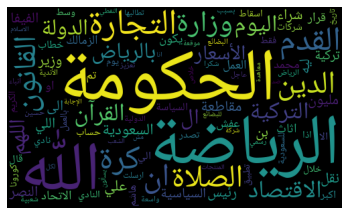

In [22]:
text=df['text']

text = ' '.join([str(elem) for elem in text])
from collections import Counter

from wordcloud import WordCloud          # pip install wordcloud
import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(text.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(500)}

wordcloud = WordCloud(random_state=0, max_words=100,width=500, height=300,  background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

#Feature Engneering

In [23]:
df['combined_text'] = df['text']+" "+df['categorie']
df.drop(['text','categorie'], axis=1, inplace = True)
df.combined_text

0         بشرى سارة لجماهير النادي الأهلي للتفاصيل الرياضة
1         احب الأنميات الرياضية يكفي اني اتابعها علي ار...
3        يسألون ليه مقاطعة البضائع التركية ليه الدولة  ...
5            فئة شيوخ الدين الي الله يكثر  امثالهم الديانة
6        مليون  الف  مجموع المبالغ اللي تم الاعلان  تبر...
                               ...                        
29553     نصراويا  تهمني قضايا النصر  تصل ان حساب قناته...
29554    شركة الصفرات بالرياض نقل عفش بالرياض وبأقل الأ...
29555    عندما يتحدث رئيس الغرف التجارية  واقع مسؤوليته...
29556    رئيس النادي الاهلي وزارة الرياضة خلال عدة أشهر...
29557    اعطي لادارة الاتحاد مليون  عامها الاول    ننسى...
Name: combined_text, Length: 14180, dtype: object

In [24]:
df.drop(['Username','location','Timestamp','followers','label'], axis=1, inplace = True)
df

,Unnamed: 0.1,combined_text
0,3276,بشرى سارة لجماهير النادي الأهلي للتفاصيل الرياضة
1,879,احب الأنميات الرياضية يكفي اني اتابعها علي ار...
3,6342,يسألون ليه مقاطعة البضائع التركية ليه الدولة ...
5,1037,فئة شيوخ الدين الي الله يكثر امثالهم الديانة
6,5910,مليون الف مجموع المبالغ اللي تم الاعلان تبر...
...,...,...
29553,1380,نصراويا تهمني قضايا النصر تصل ان حساب قناته...
29554,1297,شركة الصفرات بالرياض نقل عفش بالرياض وبأقل الأ...
29555,1844,عندما يتحدث رئيس الغرف التجارية واقع مسؤوليته...
29556,5389,رئيس النادي الاهلي وزارة الرياضة خلال عدة أشهر...


In [25]:
df.drop(['Unnamed: 0.1'], axis=1, inplace = True)
df

,combined_text
0,بشرى سارة لجماهير النادي الأهلي للتفاصيل الرياضة
1,احب الأنميات الرياضية يكفي اني اتابعها علي ار...
3,يسألون ليه مقاطعة البضائع التركية ليه الدولة ...
5,فئة شيوخ الدين الي الله يكثر امثالهم الديانة
6,مليون الف مجموع المبالغ اللي تم الاعلان تبر...
...,...
29553,نصراويا تهمني قضايا النصر تصل ان حساب قناته...
29554,شركة الصفرات بالرياض نقل عفش بالرياض وبأقل الأ...
29555,عندما يتحدث رئيس الغرف التجارية واقع مسؤوليته...
29556,رئيس النادي الاهلي وزارة الرياضة خلال عدة أشهر...


##CountVectorization

In [26]:
vectorizer= CountVectorizer()
CV = vectorizer.fit_transform(df['combined_text'])
CV.shape

(14180, 33855)

In [27]:
data_cv = pd.DataFrame(CV.toarray(),columns = vectorizer.get_feature_names())
data_cv

,ءامنوا,ءلك,آآآه,آباؤنا,آبطال,آتاه,آثار,آحادشرك,آخر,آخرة,...,يونايتد,يونس,يونغهوا,يونغي,يوهمه,ييبلغنا,ييزي,ييسر,ييسسس,يييييا
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## CountVectorization Using (1, 2) Grams

In [28]:
# the numbers are not removed here
CV_grams = CountVectorizer(stop_words= stop_ls, ngram_range = (1,2))
CV_grams_ = CV_grams.fit_transform(df['combined_text'])
CV_grams_.shape

(14180, 102374)

In [29]:
# data_grams = pd.DataFrame(CV_grams_.toarray(),columns = CV_grams.get_feature_names(),min_df = 3, max_df=0.90)
# data_grams

In [30]:
!free -mh

zsh:1: command not found: free


#TfidfVectorizer Using (1, 2) Grams

In [31]:
CV_TF_IDF = TfidfVectorizer(stop_words= stop_ls,ngram_range = (1,2))
CV_TF_IDF_ = CV_TF_IDF.fit_transform(df['combined_text'])
CV_TF_IDF_.shape

(14180, 102374)

In [32]:
df_tf = pd.DataFrame(CV_TF_IDF_.toarray(),columns = CV_TF_IDF.get_feature_names())
df_tf

,ءامنوا,ءامنوا ورسوله,ءلك,ءلك تعاني,آآآه,آآآه قرارات,آباؤنا,آباؤنا وأمهاتنا,آبطال,آبطال أسيا,...,ييبلغنا الاقتصاد,ييبلغنا الكم,ييزي,ييزي كوانتم,ييسر,ييسر فينظر,ييسسس,ييسسس اسبوعين,يييييا,يييييا ضربه
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Topic modeling

In [33]:
def display_topic(model, feature_names, no_top_words, dialict=None):
    for ix, classfy in enumerate(model.components_):
        if not dialict or not dialict[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",dialict[ix],"'")
        print(", ".join([feature_names[i]
                        for i in classfy.argsort()[:-no_top_words - 1:-1]]))

#LSA

In [34]:
lsa_ = TruncatedSVD(4)
tw_classfy = lsa_.fit_transform(CV)
# the percentage of variance that is attributed by each of the selected components/topics
lsa_.explained_variance_ratio_

array([0.02472779, 0.0261104 , 0.0184583 , 0.0171417 ])

In [35]:
display_topic(lsa_, vectorizer.get_feature_names(),30)


Topic  0
الرياضة, القدم, كرة, وزارة, الاقتصاد, الفيفا, ان, الزمالك, السياسة, العمل, الأندية, مليون, النصر, النادي, حساب, وزير, شكرا, الاتحاد, علي, الله, رئيس, الي, نادي, رياضة, الاهلي, يكون, البيت, وفقا, حسين, خلال

Topic  1
الاقتصاد, التجارة, الدولة, التركية, بالرياض, مقاطعة, ليه, نقل, شراء, تركية, اليوم, عفش, خطاب, اثاث, شركات, البضائع, السياسة, قرار, الدولية, الأسعار, اكبر, للسعودية, الإجابة, رسمي, موقعة, معاهدة, خلاص, يسألون, ارسلت, تطالبها

Topic  2
السياسة, الحكومة, القانون, الديانة, ان, هاشم, السياسية, ال, الله, تطبيق, النفطي, لكل, اليوم, الدين, سعودي, الوطني, مواطن, عاجل, بمناسبة, تصرف, المساعدة, كنوع, رئيس, الشعب, أنواع, قانون, بالمملكة, الى, السعودية, الحريري

Topic  3
الديانة, الله, الصلاة, الدين, اللهم, القرآن, قال, إني, وسلم, الرجال, والحزن, الهم, محمد, أعوذ, والبخل, والكسل, وقهر, والجبن, والعجز, الجمعة, صل, النبي, وغلبة, الكريم, علي, يوم, والسلام, ليرتاح, الاسلام, بن


LSA and TfidfVectorizer

In [36]:
lsa = TruncatedSVD(n_components=4, random_state=None)
lsa.fit(CV_TF_IDF_)

TruncatedSVD(n_components=4)

In [37]:
display_topic(model=lsa, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=50)


Topic  0
مقاطعة, التركية, الدولة, التجارة, الاقتصاد, للسعودية تطالبها, تطالبها, تركية ارسلت, خطاب للسعودية, ارسلت خطاب, ارسلت, تطالبها بالعمل, شركات تركية, بالعمل, للسعودية, شعبية واسعة, التجارة انباء, انباء مقاطعة, تعزيز التجارة, مقاطعة شعبية, بالعمل تعزيز, واسعة للبضائع, للبضائع, للبضائع التركية, شعبية, تركية, شركات, واسعة, انباء, التركية الاقتصاد, تعزيز, خطاب, البضائع التركية, الإجابة الدولة, مقاطعة البضائع, يسألون مقاطعة, التركية الدولة, الدولة تصدر, الدولة موقعة, الدولية الاقتصاد, رسمي الإجابة, معاهدة التجارة, موقعة معاهدة, التجارة الدولية, قرار رسمي, يسألون, معاهدة, الإجابة, موقعة, تصدر قرار

Topic  1
الدولة, الدولية الاقتصاد, يسألون مقاطعة, رسمي الإجابة, التركية الدولة, الدولة موقعة, مقاطعة البضائع, الدولة تصدر, الإجابة الدولة, البضائع التركية, التجارة الدولية, موقعة معاهدة, معاهدة التجارة, قرار رسمي, يسألون, معاهدة, الإجابة, موقعة, تصدر قرار, رسمي, البضائع, الدولية, تصدر, قرار, مقاطعة, التجارة, التركية, الاقتصاد, اسقاط, سيساهم, الاحفاد اسقاط, البائدة سيساهم, التركي المترنح, اخ

#NMF

In [38]:
NMF_model = NMF(n_components=4, random_state=None)
NMF_model.fit(CV)

NMF(n_components=4)

In [39]:
display_topic(model=NMF_model, feature_names=vectorizer.get_feature_names(), no_top_words=30)


Topic  0
الرياضة, القدم, كرة, وزارة, الفيفا, الزمالك, الأندية, العمل, مليون, النصر, النادي, حساب, ان, وزير, شكرا, الاتحاد, نادي, الي, رياضة, رئيس, الاهلي, علي, البيت, يكون, وفقا, حسين, الدوري, يمارس, يتابع, نصيحة

Topic  1
الاقتصاد, التجارة, الدولة, التركية, بالرياض, ليه, مقاطعة, نقل, شراء, تركية, اليوم, عفش, اثاث, خطاب, قرار, شركات, البضائع, الدولية, تصدر, الأسعار, الإجابة, اكبر, رسمي, للسعودية, موقعة, معاهدة, خلاص, يسألون, ارسلت, تطالبها

Topic  2
السياسة, الحكومة, القانون, ان, هاشم, السياسية, ال, تطبيق, النفطي, اليوم, لكل, سعودي, الوطني, عاجل, مواطن, بمناسبة, رئيس, تصرف, المساعدة, السعودية, كنوع, أنواع, بالمملكة, قانون, الشعب, الى, الحريري, القطاع, حدد, موقفك

Topic  3
الديانة, الله, الصلاة, الدين, اللهم, القرآن, قال, إني, وسلم, الرجال, والحزن, محمد, الهم, أعوذ, والكسل, والبخل, وقهر, والعجز, والجبن, الجمعة, صل, النبي, وغلبة, الكريم, علي, يوم, والسلام, ليرتاح, ان, بن


#NMF and TfidfVectorizer

In [40]:
NMF_model = NMF(n_components=4, random_state=None)
NMF_model.fit(CV_TF_IDF_)

NMF(n_components=4)

In [41]:
display_topic(model=NMF_model, feature_names=CV_TF_IDF.get_feature_names(), no_top_words=30)


Topic  0
للسعودية تطالبها, تركية ارسلت, ارسلت خطاب, تطالبها, خطاب للسعودية, ارسلت, تطالبها بالعمل, شركات تركية, بالعمل, للسعودية, التجارة انباء, انباء مقاطعة, تعزيز التجارة, واسعة للبضائع, شعبية واسعة, بالعمل تعزيز, مقاطعة شعبية, شركات, للبضائع التركية, للبضائع, شعبية, واسعة, انباء, تعزيز, خطاب, تركية, التركية الاقتصاد, مقاطعة, التركية, التجارة

Topic  1
الدولة, البضائع التركية, الإجابة الدولة, الدولة تصدر, الدولة موقعة, رسمي الإجابة, التركية الدولة, يسألون مقاطعة, مقاطعة البضائع, الدولية الاقتصاد, موقعة معاهدة, التجارة الدولية, معاهدة التجارة, قرار رسمي, يسألون, معاهدة, الإجابة, موقعة, تصدر قرار, رسمي, البضائع, الدولية, تصدر, قرار, مقاطعة, التركية, التجارة, الاقتصاد, اسقاط, التركي

Topic  2
القدم الرياضة, كرة القدم, كرة, القدم, الرياضة, المبذول, أتحدي وضع, أتحدي, الكبير المبذول, والتقدير للاعبي, المجهود, المجهود الكبير, جدول الدوري, الممتاز كرة, المبذول أتحدي, للاعبي الزمالك, الزمالك المجهود, التحية والتقدير, للاعبي, وضع جدول, الدوري الممتاز, الممتاز, جدول, التحية, والتقدير, الكبير, 

#Lable Tweet

In [42]:
topic_results = lsa.transform(CV_TF_IDF_)

df['topics'] = topic_results.argmax(axis=1)

In [43]:
data_lable = df.reset_index()

In [44]:
data_lable

,index,combined_text,topics
0,0,بشرى سارة لجماهير النادي الأهلي للتفاصيل الرياضة,2
1,1,احب الأنميات الرياضية يكفي اني اتابعها علي ار...,2
2,3,يسألون ليه مقاطعة البضائع التركية ليه الدولة ...,1
3,5,فئة شيوخ الدين الي الله يكثر امثالهم الديانة,3
4,6,مليون الف مجموع المبالغ اللي تم الاعلان تبر...,2
...,...,...,...
14175,29553,نصراويا تهمني قضايا النصر تصل ان حساب قناته...,2
14176,29554,شركة الصفرات بالرياض نقل عفش بالرياض وبأقل الأ...,0
14177,29555,عندما يتحدث رئيس الغرف التجارية واقع مسؤوليته...,2
14178,29556,رئيس النادي الاهلي وزارة الرياضة خلال عدة أشهر...,2


In [45]:
conditions = [data_lable['topics'] == 0, data_lable['topics'] == 1 ,data_lable['topics'] == 2, data_lable['topics'] == 3]

In [46]:
lable =["سياسة","اقتصاد","رياضة","دين"]

In [47]:
data_lable['Classification'] = np.select(conditions, lable,default = np.nan)

In [48]:
data_lable.head(15)

,index,combined_text,topics,Classification
0,0,بشرى سارة لجماهير النادي الأهلي للتفاصيل الرياضة,2,رياضة
1,1,احب الأنميات الرياضية يكفي اني اتابعها علي ار...,2,رياضة
2,3,يسألون ليه مقاطعة البضائع التركية ليه الدولة ...,1,اقتصاد
3,5,فئة شيوخ الدين الي الله يكثر امثالهم الديانة,3,دين
4,6,مليون الف مجموع المبالغ اللي تم الاعلان تبر...,2,رياضة
5,11,عرفنا ليش النصر يوقع اللاعبين بمبالغ كبيره وم...,2,رياضة
6,12,نادال لاعبي المفضل الرياضة,2,رياضة
7,13,بطولاتكم كانت وقت قديم جدا كانت كرة القدم بد...,2,رياضة
8,17,الفائزون بجائزة نوبل الاقتصاد بول ميلجروم ورو...,0,سياسة
9,19,يوم شاء الله أني تأخرت صلاة الظهر وكنا جما...,3,دين


In [49]:
topics=pd.DataFrame(topic_results, columns=['Topic_'+str(x) for x in range(topic_results.shape[1])])

In [50]:
topics = topics.reset_index()

In [51]:
topics.head(10)

,index,Topic_0,Topic_1,Topic_2,Topic_3
0,0,0.000392,0.000138,0.018298,0.000828
1,1,0.000433,0.000319,0.021299,0.000740
2,2,0.632071,0.772560,-0.003355,-0.000428
3,3,0.000028,0.000062,-0.000004,0.015729
4,4,0.001469,-0.001030,0.048871,-0.009322
5,5,0.000265,0.000112,0.011020,0.000387
6,6,0.000329,0.000186,0.022835,0.000690
7,7,0.000534,0.000112,0.099378,0.001823
8,8,0.015486,0.002141,0.000073,0.000061
9,9,0.000028,0.000041,0.000170,0.009625


After we done analyse precentage of classification for each tweet we now need to assigns specefic classification for each tweet

In [52]:
classification = data_lable.merge(topics, on=df.combined_text, how='left')

In [53]:
classification.drop(['key_0', 'index_x','index_y'],axis='columns', inplace=True)

In [54]:
classification=classification.drop_duplicates(subset='combined_text')

In [55]:
classification=classification.rename(columns={'Topic_0': 'سياسة', 'Topic_1': 'اقتصاد','Topic_2':'رياضة','Topic_3':'دين'})

In [56]:
classification

,combined_text,topics,Classification,سياسة,اقتصاد,رياضة,دين
0,بشرى سارة لجماهير النادي الأهلي للتفاصيل الرياضة,2,رياضة,0.000392,0.000138,0.018298,0.000828
1,احب الأنميات الرياضية يكفي اني اتابعها علي ار...,2,رياضة,0.000433,0.000319,0.021299,0.000740
2,يسألون ليه مقاطعة البضائع التركية ليه الدولة ...,1,اقتصاد,0.632071,0.772560,-0.003355,-0.000428
196,فئة شيوخ الدين الي الله يكثر امثالهم الديانة,3,دين,0.000028,0.000062,-0.000004,0.015729
197,مليون الف مجموع المبالغ اللي تم الاعلان تبر...,2,رياضة,0.001469,-0.001030,0.048871,-0.009322
...,...,...,...,...,...,...,...
241049,كوريا يروحون بانقتان الجيش راااح المحتوى ال...,0,سياسة,0.023806,0.003337,0.000063,0.000077
241058,الأعلانات كولينا عندما وصل تقاعد الحكام الاجب...,2,رياضة,0.000276,0.000126,0.001741,0.000563
241063,ابلغت الحكومة المجلس بموافقتها دراسة تمديد ت...,0,سياسة,0.000678,-0.000038,0.000302,0.000241
241272,الدين كامل النقص فينا الديانة,3,دين,0.000048,0.000121,-0.000060,0.030481


#EDA

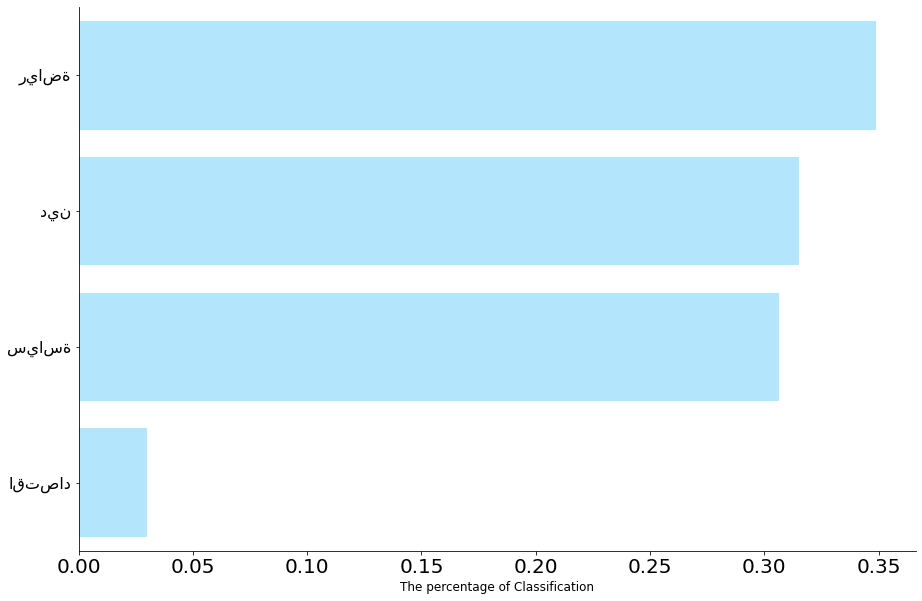

In [57]:
plt.figure(figsize=(15,10))
plt.yticks(fontsize=20, size=16) 
plt.xticks(fontsize=20) 
plt.rc('ytick', labelsize=12) 
sns.barplot(y=data_lable['Classification'].value_counts().index, 
            x=data_lable['Classification'].value_counts(normalize=True, ascending=False), 
            data=data_lable, orient='h', 
            color='#b3e5fc',saturation=1
           )
plt.xlabel('The percentage of Classification', fontsize=12)
#plt.ylabel(fontsize=12, **t_font)

sns.despine();

#Topics Word Clouds

100 most common words in Politic tweets

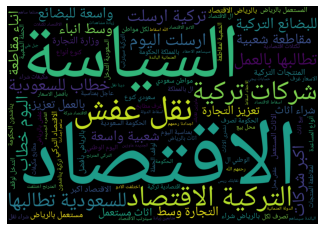

In [58]:
# Create a WordCloud 
Politic_df = data_lable[(data_lable['Classification']=='سياسة')]

long_string = ','.join(list(Politic_df.combined_text.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

100 most common words in Economey tweets

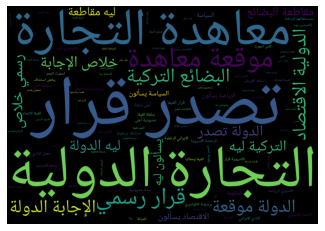

In [59]:
# Create a WordCloud 
Politic_df = data_lable[(data_lable['Classification']=='اقتصاد')]

long_string = ','.join(list(Politic_df.combined_text.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

100 most common words in Sport tweets

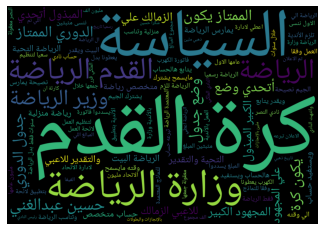

In [60]:
# Create a WordCloud 
Politic_df = data_lable[(data_lable['Classification']=='رياضة')]

long_string = ','.join(list(Politic_df.combined_text.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

100 most common words in Religion tweets

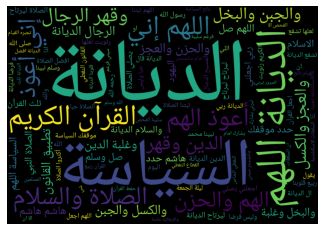

In [61]:
# Create a WordCloud 
Politic_df = data_lable[(data_lable['Classification']=='دين')]

long_string = ','.join(list(Politic_df.combined_text.values))

reshaped_text = arabic_reshaper.reshape(long_string)
bidi_text = get_display(reshaped_text)
wordcloud = WordCloud(stopwords=stop_ls,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
plt.imshow(wordcloud, interpolation= None)
plt.axis("off")
plt.show()

#Prepare data for modeling

In [62]:
# Split the data into X and y data sets
X = classification.combined_text
y = classification.Classification

In [63]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams

cv1 = TfidfVectorizer(stop_words= stop_ls,ngram_range = (1,2))

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

#pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

#Classification 

Logistic Regression model

In [65]:
# Create a logistic regression model to use
lr = LogisticRegression()

In [66]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [67]:
print(classification_report(y_test,y_pred_cv1))

              precision    recall  f1-score   support

      اقتصاد       0.00      0.00      0.00        44
         دين       0.83      0.99      0.90       862
       رياضة       0.97      0.80      0.88       759
       سياسة       0.92      0.93      0.93       676

    accuracy                           0.89      2341
   macro avg       0.68      0.68      0.68      2341
weighted avg       0.89      0.89      0.88      2341



In [68]:
print("Logistic Regression Accuracy=",accuracy_score(y_test, y_pred_cv1))
print("Logistic Regression F1 score=",f1_score(y_test, y_pred_cv1, average='micro'))

Logistic Regression Accuracy= 0.8923536950021358
Logistic Regression F1 score= 0.8923536950021358


Naive Bayes model

In [69]:
# Fit the first Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [70]:
print(classification_report(y_test,y_pred_cv1_nb))

              precision    recall  f1-score   support

      اقتصاد       0.00      0.00      0.00        44
         دين       0.89      0.95      0.92       862
       رياضة       0.92      0.85      0.88       759
       سياسة       0.87      0.92      0.89       676

    accuracy                           0.89      2341
   macro avg       0.67      0.68      0.67      2341
weighted avg       0.88      0.89      0.88      2341



In [71]:
print("Naive Bayes Accuracy=",accuracy_score(y_test,y_pred_cv1_nb))
print("Naive Bayes F1 score=",f1_score(y_test, y_pred_cv1_nb, average='micro'))

Naive Bayes Accuracy= 0.8923536950021358
Naive Bayes F1 score= 0.8923536950021358


SVM model

In [72]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = SVC(kernel='linear')
SVM.fit(X_train_cv1,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test_cv1)

In [73]:
print(classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

      اقتصاد       0.86      0.68      0.76        44
         دين       0.84      0.98      0.91       862
       رياضة       0.96      0.82      0.88       759
       سياسة       0.95      0.92      0.94       676

    accuracy                           0.91      2341
   macro avg       0.90      0.85      0.87      2341
weighted avg       0.91      0.91      0.91      2341



In [74]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy=",accuracy_score(predictions_SVM, y_test))
print("SVM F1 score=",f1_score(y_test,predictions_SVM, average='micro'))

SVM Accuracy= 0.9073045706962837
SVM F1 score= 0.9073045706962838


Saving the model

In [75]:
import pickle
pickle.dump(SVM, open('model.pkl', 'wb'))

In [76]:
pickle.dump(cv1, open("vectorizer.pickle", "wb"))